In [1]:
from utils import contract_core, tno_to_tne, extract_bitstring, iter_layers
from qiskit import QuantumCircuit
import pandas as pd
import time

### Load circuits

In [2]:
circuit = QuantumCircuit.from_qasm_file("peaked_circuit_heavy_hex_49x5072.qasm")

### Separate circuit into layers

In [3]:
t0 = time.perf_counter()
circuit_layers = list(iter_layers(circuit))

### Start a TNO at the center of the circuit and iteratively merge and contract layers into it

In [4]:
tno, stats = contract_core(circuit_layers, chunk_size=2, cutoff=0.01, max_bond=16, to_backend=None)
tno

    (|280-281|-282-|283-284|)/(565) -> max_bond = 2, max_links = 4, total_elems = 544, total_shapes = 324
    (|278-279|-282-|285-286|)/(565) -> max_bond = 4, max_links = 4, total_elems = 612, total_shapes = 324
    (|276-277|-282-|287-288|)/(565) -> max_bond = 5, max_links = 4, total_elems = 688, total_shapes = 362
    (|274-275|-282-|289-290|)/(565) -> max_bond = 4, max_links = 4, total_elems = 800, total_shapes = 384
    (|272-273|-282-|291-292|)/(565) -> max_bond = 4, max_links = 4, total_elems = 864, total_shapes = 392
    (|270-271|-282-|293-294|)/(565) -> max_bond = 4, max_links = 4, total_elems = 912, total_shapes = 396
    (|268-269|-282-|295-296|)/(565) -> max_bond = 4, max_links = 4, total_elems = 944, total_shapes = 400
    (|266-267|-282-|297-298|)/(565) -> max_bond = 4, max_links = 4, total_elems = 864, total_shapes = 392
    (|264-265|-282-|299-300|)/(565) -> max_bond = 4, max_links = 4, total_elems = 912, total_shapes = 396
    (|262-263|-282-|301-302|)/(565) -> max_bon

TensorNetworkGenOperator(tensors=49, indices=150)

### Apply the TNO to the |0> state

In [5]:
tne = tno_to_tne(tno, max_bond=8, cutoff=0.01, to_backend=None)

max_bond = 3, max_links = 4


### Extract the bitstring with single-bit marginals

In [6]:
pred_bitstring, qubit_marginals = extract_bitstring(tne)
pred_bitstring[::-1]

/home/ubuntu/.venv/lib/python3.11/site-packages/quimb/tensor/tensor_core.py:8590: UserWarning: The contraction tree is not a compressed one, this may be very inefficient.
  warnings.warn(


'1001100011100000001010100001011111111011110010110'

In [7]:
print(time.perf_counter() - t0)

17.3452753033489


<Axes: xlabel='iteration'>

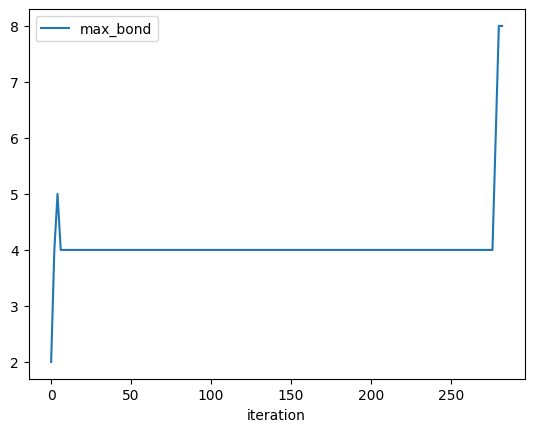

In [ ]:
stats_df = pd.DataFrame(stats)
stats_df.plot(x="layer", y="max_bond")

<Axes: xlabel='iteration'>

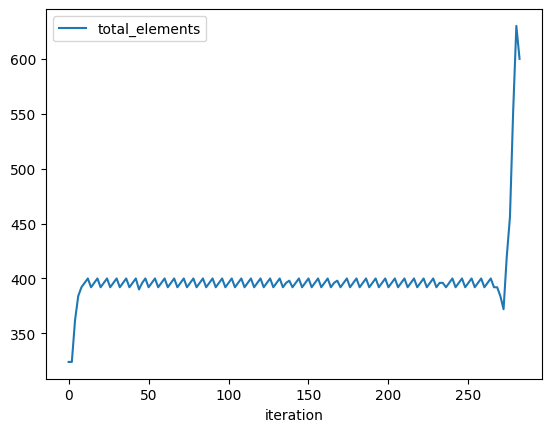

In [ ]:
stats_df.plot(x="layer", y="total_elements")